In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path

from matplotlib import pyplot as plt
import torch

from grconvnet._orig.utils.visualisation.plot import plot_results

from grconvnet.preprocessing import RebuildLegacyPreprocessor, LegacyPreprocessor
from grconvnet.dataloading import CornellDataset
from grconvnet.postprocessing import LegacyPostprocessor
from grconvnet.models import GenerativeResnet
from grconvnet.utils.export import Exporter

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
dataset = CornellDataset(Path("/home/moritz/Documents/cornell"), transform= RebuildLegacyPreprocessor())

device = "cuda"
model = GenerativeResnet.from_jit(device=device)

postprocessor = LegacyPostprocessor()

In [3]:
sample = dataset[745]
sample = sample.to(device)

with torch.no_grad():
    predictions = model(sample.unsqueeze(0))

grasps_img = postprocessor(predictions)

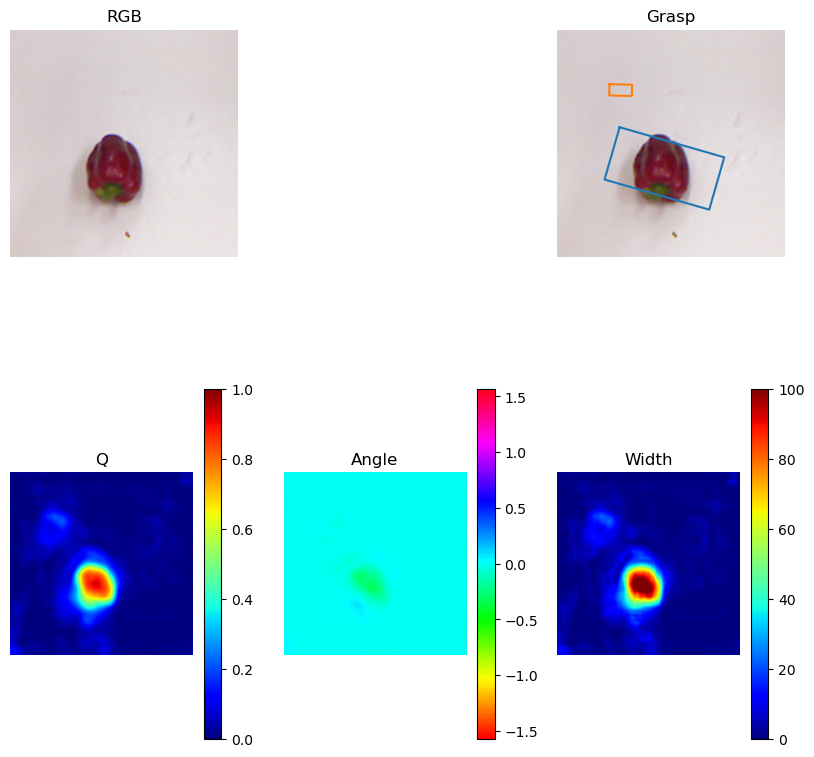

In [4]:
fig = plt.figure(figsize=(10, 10))

plot_results(
    fig=fig,
    rgb_img=dataset.transform.intermediate_results["rgb_cropped"].astype("uint8"),
    grasp_q_img=postprocessor.intermediate_results["q_img"],
    grasp_angle_img=postprocessor.intermediate_results["angle_img"],
    no_grasps=2,
    grasp_width_img=postprocessor.intermediate_results["width_img"],
)